In [21]:
import os
from skimage import io
from skimage.feature import blob_doh
from skimage.filters import threshold_otsu
from skimage.color import rgb2gray
import matplotlib.pyplot as plt
import numpy as np

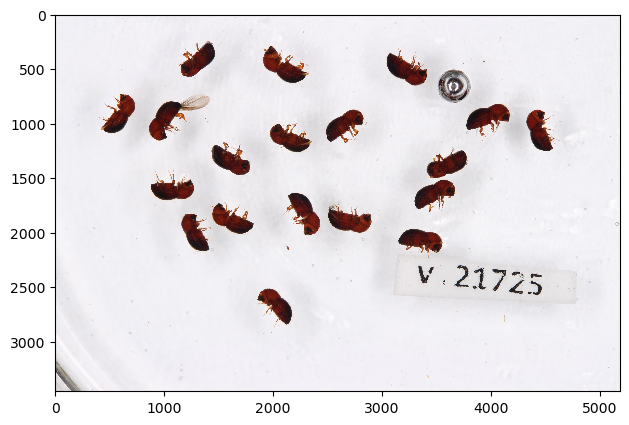

In [3]:
# read image
wd = os.getcwd()
image = io.imread(wd+"/IMG_0269.JPG")
io.imshow(image)

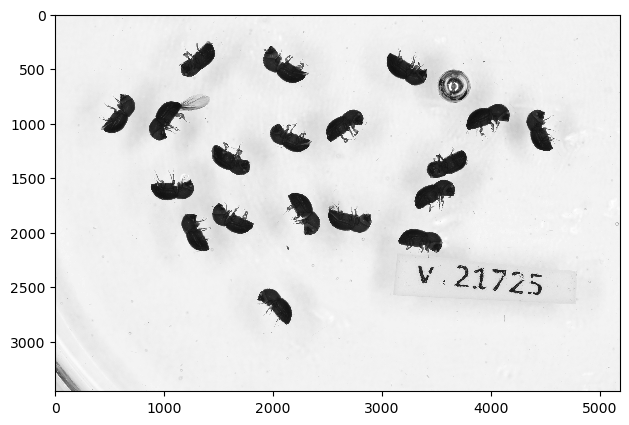

In [4]:
# grey image
image_gray = rgb2gray(image)
io.imshow(image_gray)

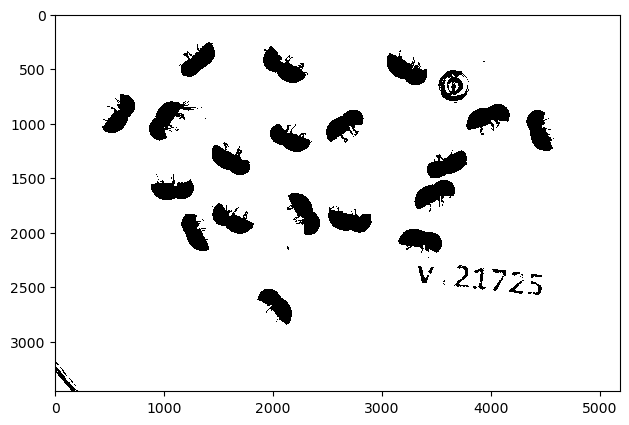

In [30]:
# binarise data
global_thresh = threshold_otsu(image_gray)
binary_global = image_gray > global_thresh

io.imshow(binary_global)

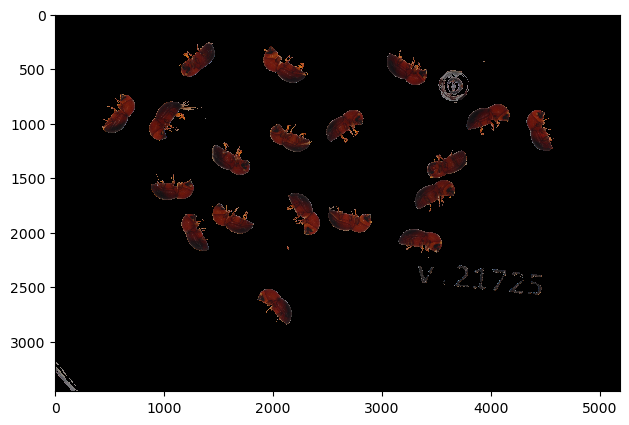

In [22]:
mask = image.copy()
for i in range(3):
    mask[:,:,i] = np.invert(binary_global)*image[:,:,i]
io.imshow(mask)

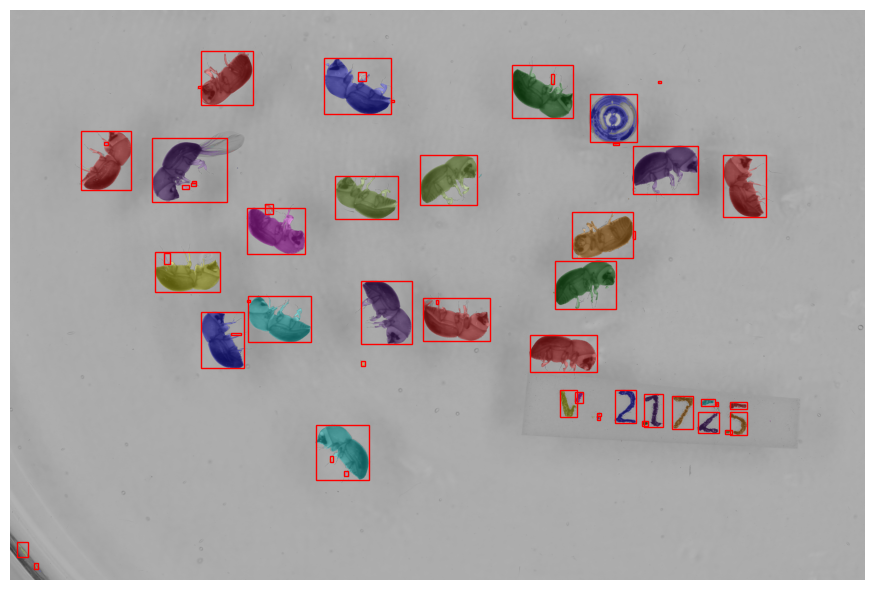

In [54]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

from skimage import data
from skimage.filters import threshold_otsu
from skimage.segmentation import clear_border
from skimage.measure import label, regionprops, regionprops_table
from skimage.morphology import closing, square
from skimage.color import label2rgb


# image = data.coins()[50:-50, 50:-50]
# # apply threshold
# thresh = threshold_otsu(image)
# bw = closing(image > thresh, square(10))

image = io.imread(wd+"/IMG_0269.JPG")
image_gray = rgb2gray(image)
global_thresh = threshold_otsu(image_gray)
binary_global = image_gray > global_thresh
bw = np.invert(binary_global)

# remove artifacts connected to image border
cleared = clear_border(bw)

# label image regions
label_image = label(cleared)
# to make the background transparent, pass the value of `bg_label`,
# and leave `bg_color` as `None` and `kind` as `overlay`
image_label_overlay = label2rgb(label_image, image=image, bg_label=0)

fig, ax = plt.subplots(figsize=(10, 6))
ax.imshow(image_label_overlay)

for region in regionprops(label_image):
    # take regions with large enough areas
    if region.area >= 100:
        # draw rectangle around segmented coins
        minr, minc, maxr, maxc = region.bbox
        rect = mpatches.Rectangle((minc, minr), maxc - minc, maxr - minr,
                                  fill=False, edgecolor='red', linewidth=1)
        ax.add_patch(rect)

ax.set_axis_off()
plt.tight_layout()
plt.show()

In [73]:
import pandas as pd
props = regionprops_table(label_image, properties=('centroid',
                                                 'orientation',
                                                 'axis_major_length',
                                                 'axis_minor_length',
                                                 'area'))

props_df = pd.DataFrame(props)
props_df = props_df.sort_values('area').reset_index(drop=True)
props_df

,centroid-0,centroid-1,orientation,axis_major_length,axis_minor_length,area
0,3431.000000,129.000000,0.785398,0.000000,0.000000,1
1,796.000000,1286.000000,0.785398,0.000000,0.000000,1
2,1077.000000,4013.000000,0.785398,0.000000,0.000000,1
3,1084.000000,2288.000000,0.785398,0.000000,0.000000,1
4,2658.000000,1897.000000,0.785398,0.000000,0.000000,1
...,...,...,...,...,...,...
248,1824.680464,2291.488150,0.511567,450.451713,194.847587,63079
249,515.503023,3221.387215,1.063473,434.000914,196.491817,63182
250,944.362944,3971.256151,-1.264670,438.272353,203.236203,63244
251,961.056182,1019.058486,-0.722361,464.519407,220.135576,65982


<AxesSubplot:>

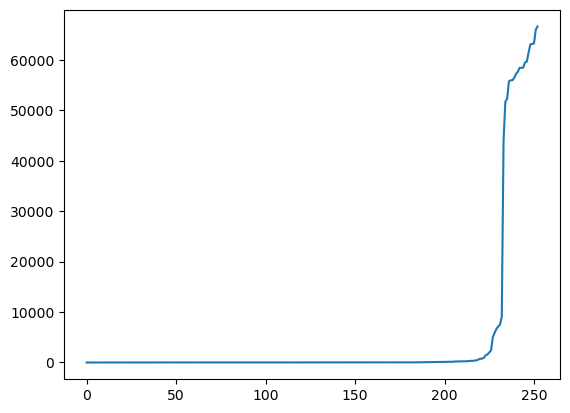

In [74]:
props_df.area.plot()

<AxesSubplot:ylabel='Density'>

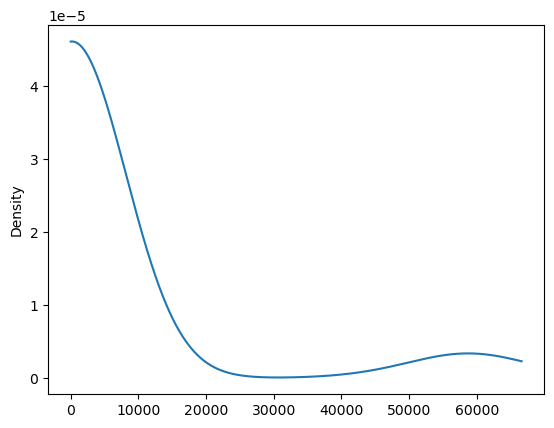

In [87]:
props_df.area.plot.kde(bw_method=0.5, ind=range(0,max(props_df.area)))

In [ ]:
# make threshold as smallest value above 1 that has 0 counts
# clip images based on coordiantes pl.us a few 
# calculate area of each image
# classify circle image
# give relative surface area based on circle classified image